## Capstone Project - The Battle of the Neighborhoods 

## Table of contents
* [Business Problem](#BusinessProblem)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


### Business Problem <a name="BusinessProblem"></a>

In this project we will try to find a suitable location/Neighborhood to open a restaurants in Chennai, India.Since Quick service restaurants are pick up slowly in Indian market. We would try to identify the location where investors more interested to open QSR restaurants 

We will use our data science powers to generate a few most promising neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

In [2]:
#import required libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup #import the Beautiful soup functions to parse the data returned from the website
from geopy.geocoders import Nominatim # import Nominatim for lan, lat
import folium # library for map

### Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* Find out the list of neighborhoods in and around Chennai location 
* Number of existing restaurants in the neighborhood (any type of restaurant)
* Categorize the restaurants based on nature like dining, QSRs, Cafes

Following data sources will be needed to extract/generate the required information:
* List of Neighborhoods will be extracted from wiki page using web scraping 
* Geo coordinates will be extracted using **Google Maps API reverse geocoding**
* Restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**

In [3]:
# wiki URL to get Chennai neighborhood 
url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai'
results = requests.get(url)
soup = BeautifulSoup(results.text,'html.parser')
# assign the right table to object for data parsing
# capture the data from wiki page stored them into list then finally move them into data frame.
# since data is not in organized format, it has to be aligned to the locality before loading them into dataframe

data = soup.find('div',class_ ='mw-content-ltr')
#print(data)
ul = data.find_all('ul')
#print(ul[2])
Locality_area = []
Neighbourhood = []
li_data = ul[1].find_all('li')
Locality_area.append("North Chennai")
Neighbourhood.append(li_data[0].text)

li_data2 =ul[2].find_all('li')
for item in li_data2:
    temp = item.text
    Locality_area.append("North Chennai")
    Neighbourhood.append(temp)

li_data3 =ul[3].find_all('li')
for item in li_data3:
    temp = item.text
    Locality_area.append("West Chennai")
    Neighbourhood.append(temp)   

li_data4 =ul[4].find_all('li')
for item in li_data4:
    temp = item.text
    Locality_area.append("South and East Chennai")
    Neighbourhood.append(temp) 

li_data5 =ul[5].find_all('li')
for item in li_data5:
    temp = item.text
    Locality_area.append("Northern Suburbs of Chennai")
    Neighbourhood.append(temp)

li_data6 =ul[6].find_all('li')
for item in li_data6:
    temp = item.text
    Locality_area.append("Western Suburbs Chennai")
    Neighbourhood.append(temp)

li_data7 =ul[7].find_all('li')
for item in li_data7:
    temp = item.text
    Locality_area.append("Southern-western Suburbs of Chennai")
    Neighbourhood.append(temp)

li_data8 =ul[8].find_all('li')
for item in li_data8:
    temp = item.text
    Locality_area.append("Southern-western Suburbs of Chennai")
    Neighbourhood.append(temp)

li_data9 =ul[9].find_all('li')
for item in li_data9:
    temp = item.text
    Locality_area.append("ECR and OMR of Chennai")
    Neighbourhood.append(temp)

In [4]:
#load the data into dataframe
chennai_df = pd.DataFrame({'Locality_area':Locality_area,
                          'Neighbourhood':Neighbourhood})

chennai_df.drop_duplicates('Neighbourhood',keep='first',inplace=True)

niegh_list = chennai_df['Neighbourhood'].tolist()
print("shape of the chennai neighbourhood data frame",chennai_df.shape)

shape of the chennai neighbourhood data frame (143, 2)


Google API's will be used to get the Latitude and Longitude Coordinates of Chennai neighborhood 
then it will be added in Geo dataframe

In [66]:
# Simplest way to get the lat, long of any address.
lat = []
lng = []
for location in niegh_list:
    address = location+',Chennai,TN'
    api_key = '##################################'
    GOOGLE_MAPS_API_URL = 'https://maps.googleapis.com/maps/api/geocode/json?address='+address+'&key='+api_key

    # Do the request and get the response data
    req = requests.get(GOOGLE_MAPS_API_URL)
    res = req.json()
    #print(res)
    # Use the first result
    result = res['results'][0]
    geodata = dict()
    lat.append(result['geometry']['location']['lat'])
    lng.append(result['geometry']['location']['lng'])
    
geo_df = pd.DataFrame({'Neighbourhood':niegh_list,
                       'Latitude':lat,
                       'Longitude':lng})

geo_df.to_csv('C:\\DataScience\\IBM Data Science\\Final_project\\chennai_geo_location.csv')


In [5]:
# Access the Geo data from stored CSV file
geo_df = pd.read_csv('C:\\DataScience\\IBM Data Science\\Final_project\\chennai_geo_location.csv',index_col = 0)
geo_df.drop_duplicates('Neighbourhood',keep='first',inplace=True)
geo_df.head()

,Neighbourhood,Latitude,Longitude
0,Red Hills,13.186464,80.199878
1,Royapuram,13.113701,80.295412
2,Korukkupet,13.118550,80.277997
3,Vyasarpadi,13.118381,80.259422
4,Tondiarpet,13.126106,80.287996


In [7]:
chennai_df_new=pd.merge(chennai_df,geo_df, left_on='Neighbourhood',right_on='Neighbourhood')
print("Shape of Geo locations ",chennai_df_new.shape)

Shape of Geo locations  (103, 4)


In [8]:
# to get Geo Coordinate of chennai city
address = 'Chennai, TN'

geolocator = Nominatim(user_agent="chennai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chennai, Tamilnadu are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chennai, Tamilnadu are 13.0801721, 80.2838331.


Let's visualize the data what we have so far: 

In [9]:
# create map of chennai using latitude and longitude values
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(chennai_df_new['Latitude'], chennai_df_new['Longitude'], chennai_df_new['Locality_area'], chennai_df_new['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

In [16]:
CLIENT_ID = '**************************************' # your Foursquare ID
CLIENT_SECRET = '**********************************' # your Foursquare Secret
VERSION = '20191201' # Foursquare API version


In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# function to get neighbouring venues in and around Tronoto
def getNearbyVenues(names, latitudes, longitudes,radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
                
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
# Let's now go over our neighborhood locations and get nearby restaurants;
LIMIT = 100
# to get venues details around chennai neighbourhood
chennai_venues = getNearbyVenues(names=chennai_df_new['Neighbourhood'],
                                   latitudes=chennai_df_new['Latitude'],
                                   longitudes=chennai_df_new['Longitude'])
#store the data in local to refer for future reference 
chennai_venues.to_csv('C:\\DataScience\\IBM Data Science\\Final_project\\chennai_venue_details.csv')

In [13]:
chennai_venues = pd.read_csv('C:\\DataScience\\IBM Data Science\\Final_project\\chennai_venue_details.csv',index_col = 0)
print("shape of chennai venues dataframe",chennai_venues.shape)

shape of chennai venues dataframe (1549, 7)


Looking good. So now we have captured the venue details in chennai neighborhoods 

### Methodology <a name="methodology"></a>

* Step 1 - Filter the Restaurant venues details from complete list
* Step 2-  Categorize the Restaurant type like Dining, Quick service Restaurants(QSRs) and Cafes
* Step 3 - To find out the suitable locations/neighborhoods (using **k-means clustering**) this will provide the locations to the investor to find out the optimal place to start the restaurants

### Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data

In [14]:
print('There are {} uniques categories.'.format(len(chennai_venues['Venue Category'].unique())))

There are 175 uniques categories.


In [15]:
# filter the categories which are related to food/restaurant  types
search_str = ['Indian Restaurant','Vegetarian / Vegan Restaurant','Asian Restaurant','Chinese Restaurant','Diner',
              'Multicuisine Indian Restaurant','Russian Restaurant', 'Korean Restaurant','Halal Restaurant','Hyderabadi Restaurant',
              'Thai Restaurant','South Indian Restaurant','Comfort Food Restaurant', 'Mexican Restaurant','Italian Restaurant',
              'American Restaurant','African Restaurant','North Indian Restaurant','New American Restaurant','Buffet',
              'Mediterranean Restaurant','Middle Eastern Restaurant','Kerala Restaurant','Portuguese Restaurant','Restaurant',
              'Andhra Restaurant','Seafood Restaurant','Kebab Restaurant','Japanese Curry Restaurant','Molecular Gastronomy Restaurant'
              'Modern European Restaurant', 'Malay Restaurant','Afghan Restaurant','Chettinad Restaurant', 'Ramen Restaurant',
              'Sandwich Place','Pizza Place','Fast Food Restaurant','Bistro','Salad Place','Food', 'Fried Chicken Joint','Breakfast Spot',
              'Burger Joint','Dessert Shop', 'Food & Drink Shop','Coffee Shop',  'Ice Cream Shop','Café', 'Snack Place','Juice Bar','Tea Room',
              'Cafeteria','Hotel Bar','Food Court',  'Steakhouse', 'Gaming Cafe', 'Donut Shop','Chaat Place','Pub', 'Whisky Bar']

Rest_venue_df = chennai_venues[chennai_venues['Venue Category'].str.contains('|'.join(search_str))]
print("shape of chennai Restaurants",Rest_venue_df.shape)

shape of chennai Restaurants (860, 7)


In [16]:
# check the data how it looks after filter
Rest_venue_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Royapuram,13.113701,80.295412,Ibaco,13.115612,80.294837,Dessert Shop
3,Royapuram,13.113701,80.295412,Hotel Pandia's,13.107839,80.291133,Indian Restaurant
8,Korukkupet,13.118550,80.277997,Adayar Ananda Bhavan,13.118110,80.284481,Vegetarian / Vegan Restaurant
9,Korukkupet,13.118550,80.277997,aws chats and sandwich,13.113717,80.282494,Sandwich Place
10,Korukkupet,13.118550,80.277997,Idli Vilas,13.117964,80.285028,Vegetarian / Vegan Restaurant


There are three type of Restaurant types of there in the Organised Formats
* Dinning
* Quick Service Restaurants(QSRs)
* Bars and Cafes

There new columns will be created based on the above Restaurant types.it called as Dining, QSRS and Cafes

In [17]:
Dining = ['Indian Restaurant','Vegetarian / Vegan Restaurant','Asian Restaurant','Chinese Restaurant','Diner',
          'Multicuisine Indian Restaurant','Russian Restaurant', 'Korean Restaurant','Halal Restaurant','Hyderabadi Restaurant',
          'Thai Restaurant','South Indian Restaurant','Comfort Food Restaurant', 'Mexican Restaurant','Italian Restaurant',
          'American Restaurant','African Restaurant','North Indian Restaurant','New American Restaurant','Buffet',
          'Mediterranean Restaurant','Middle Eastern Restaurant','Kerala Restaurant','Portuguese Restaurant','Restaurant',
          'Andhra Restaurant','Seafood Restaurant','Kebab Restaurant','Japanese Curry Restaurant','Molecular Gastronomy Restaurant',
          'Modern European Restaurant', 'Malay Restaurant','Afghan Restaurant','Chettinad Restaurant', 'Ramen Restaurant',
         'Food','Breakfast Spot']

QSRS = ['Sandwich Place','Pizza Place','Fast Food Restaurant','Bistro','Salad Place', 'Fried Chicken Joint',
        'Burger Joint','Steakhouse']

cafes = ['Dessert Shop', 'Food & Drink Shop','Coffee Shop','Ice Cream Shop','Café', 'Snack Place','Juice Bar',
         'Tea Room','Cafeteria','Hotel Bar','Food Court', 'Gaming Cafe', 'Donut Shop','Chaat Place','Pub', 'Whisky Bar']


Rest_venue_df['Dining'] = Rest_venue_df.apply(lambda row: 1 if row['Venue Category'] in Dining else 0, axis = 1)
Rest_venue_df['QSRS'] = Rest_venue_df.apply(lambda row: 1 if row['Venue Category'] in QSRS else 0, axis = 1)
Rest_venue_df['cafes'] = Rest_venue_df.apply(lambda row: 1 if row['Venue Category'] in cafes else 0, axis = 1)

C:\Users\Rameshkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rameshkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rameshkumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

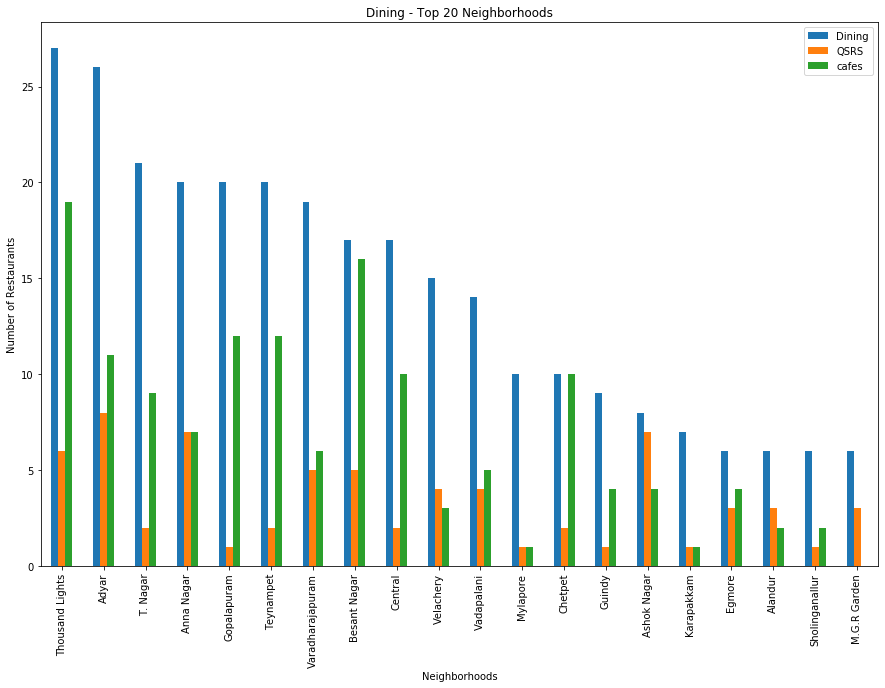

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Rest_venue_df_final = Rest_venue_df[['Neighborhood','Dining','QSRS','cafes']]
data = Rest_venue_df_final.groupby(["Neighborhood"]).sum()
dining = data.sort_values("Dining", axis = 0, ascending = False, na_position ='last')
qsrs = data.sort_values("QSRS", axis = 0, ascending = False, na_position ='last')
dining[0:20].plot(kind='bar',figsize=(15, 10))
plt.ylabel('Number of Restaurants')
plt.title('Dining - Top 20 Neighborhoods')
plt.xlabel('Neighborhoods')
plt.show()

There are close to 6 neighborhoods which are having more than 20 dining/causal dining Restaurants . Those area are **Thousand lights, Adyar, T.Nagar, Anna Nagar, Gopalapuram and Teynampet**. Cafes and lounges type of also bit populated in this Neighborhoods 

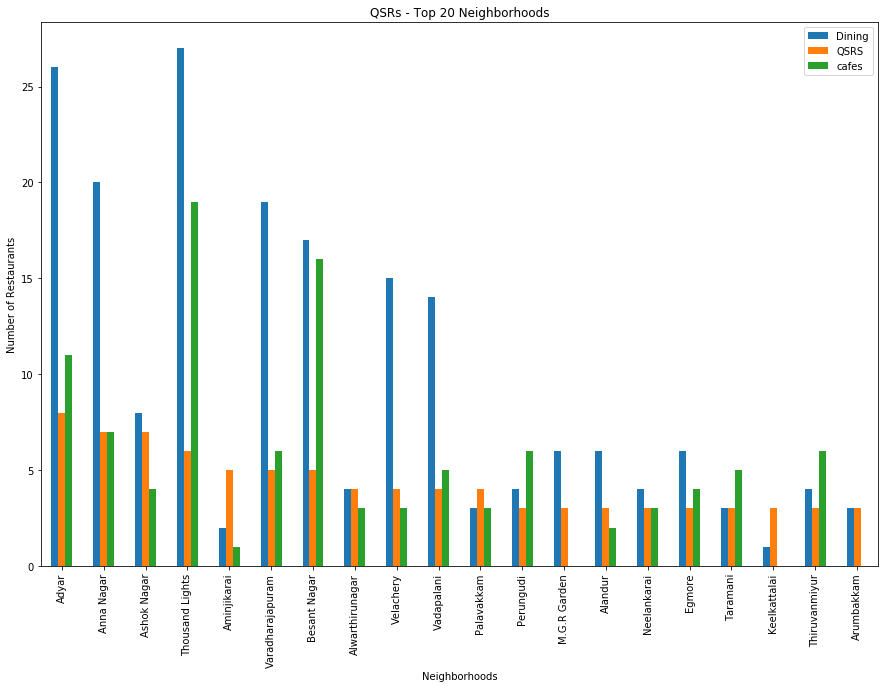

In [21]:
qsrs = data.sort_values("QSRS", axis = 0, ascending = False, na_position ='last')
qsrs[0:20].plot(kind='bar',figsize=(15, 10))
plt.ylabel('Number of Restaurants')
plt.title('QSRs - Top 20 Neighborhoods')
plt.xlabel('Neighborhoods')
plt.show()

Quick service Restaurants are slowly picking up in Chennai,it is not much populated like casual dining Restaurants. **Adyar,Anna Nagar,Ashok Nagar, Thousand lights, Aminjikarai** are having more than 5 QSRs. 

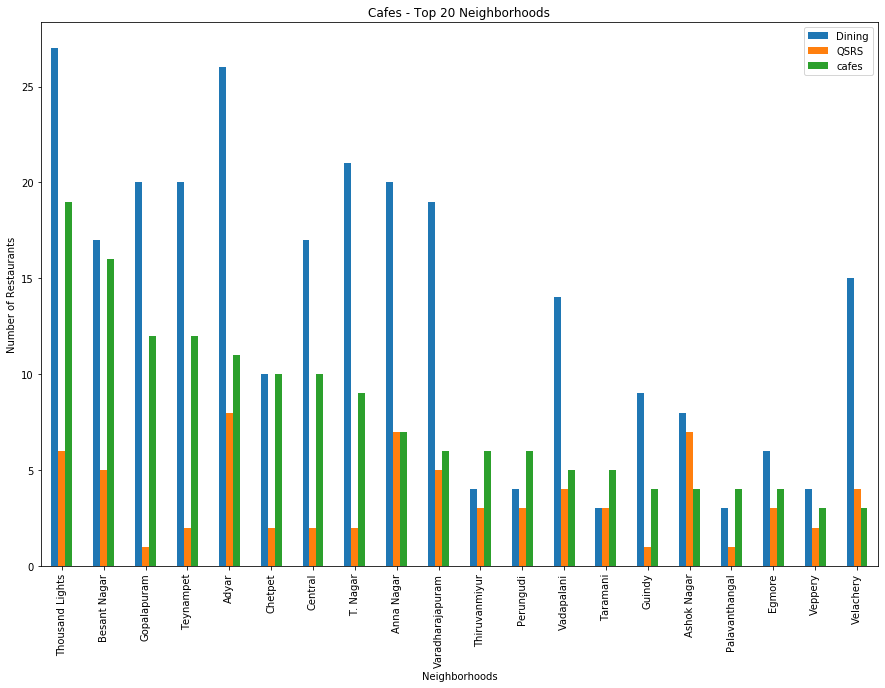

In [22]:
cafes = data.sort_values("cafes", axis = 0, ascending = False, na_position ='last')
cafes[0:20].plot(kind='bar',figsize=(15, 10))
plt.ylabel('Number of Restaurants')
plt.title('Cafes - Top 20 Neighborhoods')
plt.xlabel('Neighborhoods')
plt.show()

There are 5 neighborhoods having more than 10 cafes and lounges type restaurants. Those neighbourhoods are **Thousand Lights, Besant Nagar,Gopalapuram, Teynampet and Adyar** there are 2 of them having close 10 , those are **Chetpet and Chennai Central**

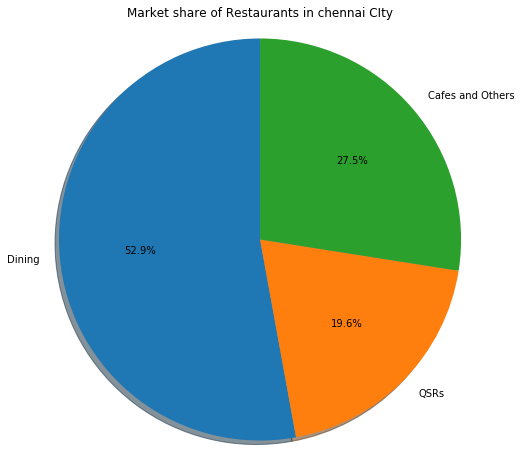

In [23]:
total_sep = pd.DataFrame({'Restaurants type':['Dining','QSRs','Cafes and Others'],
                         'Count':[data['Dining'].sum(),data['QSRS'].sum(),data['cafes'].sum()]})
    
total_sep.set_index('Restaurants type',inplace=True)
total_sep['Count'].plot(kind='pie',figsize=(8, 8),startangle=90,autopct='%1.1f%%',shadow=True)
plt.title('Market share of Restaurants in chennai CIty')
plt.axis('equal')
plt.axis('off')
plt.show()

It is observed that percentage of restaurants available in data set is similar to data represented in CAGR reporting. This data is sufficient to continue for further analysis and model building 

In [24]:
# group by mean to normalize the data to use it in KMeans 
kl_grouped = Rest_venue_df_final.groupby(["Neighborhood"]).mean().reset_index()
print(kl_grouped.shape)


(124, 4)


In [25]:
kl_grouped.head()

,Neighborhood,Dining,QSRS,cafes
0,Adyar,0.577778,0.177778,0.244444
1,Alandur,0.545455,0.272727,0.181818
2,Alapakkam,0.000000,0.500000,0.500000
3,Alwarthirunagar,0.363636,0.363636,0.272727
4,Aminjikarai,0.250000,0.625000,0.125000


In [26]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
kclusters = 3

kl_clustering = kl_grouped.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [27]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
kl_merged = kl_grouped.copy()

# add clustering labels
kl_merged["Cluster Labels"] = kmeans.labels_

In [28]:
kl_merged.rename(columns={"Neighborhood": "Neighbourhood"}, inplace=True)
kl_merged.head()


,Neighbourhood,Dining,QSRS,cafes,Cluster Labels
0,Adyar,0.577778,0.177778,0.244444,1
1,Alandur,0.545455,0.272727,0.181818,1
2,Alapakkam,0.000000,0.500000,0.500000,0
3,Alwarthirunagar,0.363636,0.363636,0.272727,0
4,Aminjikarai,0.250000,0.625000,0.125000,0


In [29]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kl_merged = kl_merged.join(geo_df.set_index("Neighbourhood"), on="Neighbourhood")

print(kl_merged.shape)
kl_merged.head() # check the last columns!

(124, 7)


,Neighbourhood,Dining,QSRS,cafes,Cluster Labels,Latitude,Longitude
0,Adyar,0.577778,0.177778,0.244444,1,13.001177,80.256496
1,Alandur,0.545455,0.272727,0.181818,1,12.997487,80.200637
2,Alapakkam,0.000000,0.500000,0.500000,0,13.049031,80.167278
3,Alwarthirunagar,0.363636,0.363636,0.272727,0,13.042551,80.184019
4,Aminjikarai,0.250000,0.625000,0.125000,0,13.069791,80.224514


In [30]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = ['green','red','orange']
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Latitude'], kl_merged['Longitude'], kl_merged['Neighbourhood'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [31]:
print("The following Neighborhoods are potential to start casual Dining restaurants")
kl_merged[(kl_merged['Cluster Labels'] == 0) & (kl_merged['Dining'] <0.20)].set_index('Neighbourhood')

The following Neighborhoods are potential to start casual Dining restaurants


,Dining,QSRS,cafes,Cluster Labels,Latitude,Longitude
Neighbourhood,,,,,,
Alapakkam,0.000000,0.500000,0.500000,0,13.049031,80.167278
Choolai,0.000000,0.666667,0.333333,0,13.091873,80.264191
Iyyapanthangal,0.000000,0.666667,0.333333,0,13.038062,80.135355
Iyyappanthangal,0.000000,0.666667,0.333333,0,13.038062,80.135355
Kodungaiyur,0.000000,1.000000,0.000000,0,13.137455,80.247850
Kolappakkam,0.000000,1.000000,0.000000,0,13.010112,80.149232
M.G.R Nagar,0.166667,0.333333,0.500000,0,13.035225,80.197270
M.K.B Nagar,0.000000,1.000000,0.000000,0,13.125841,80.262221
Maduravoyal,0.000000,1.000000,0.000000,0,13.064142,80.160788


The above Neighborhoods do not have any casual dining type Restaurants but there are having quite few QSR type Restaurants. Based on our analysis, **These locations would be potential to start casual dining type restaurants**. Investors can do further deep analysis on these locations like land price, population and income of household to identify the best or suitable location from this list 

In [32]:
print("The following Neighborhoods are potential to start QSRs type restaurants")
kl_merged.loc[(kl_merged['Cluster Labels'] == 1) & (kl_merged['QSRS'] <0.01)].set_index('Neighbourhood')


The following Neighborhoods are potential to start QSRs type restaurants


,Dining,QSRS,cafes,Cluster Labels,Latitude,Longitude
Neighbourhood,,,,,,
Anakaputhur,1.000000,0.0,0.000000,1,12.980190,80.126461
Chembarambakkam,1.000000,0.0,0.000000,1,13.031863,80.038231
Defence Colony,0.666667,0.0,0.333333,1,13.026158,80.202152
Erukanchery,0.500000,0.0,0.500000,1,13.127733,80.248470
Gerugambakkam,1.000000,0.0,0.000000,1,13.010090,80.139078
Guduvancherry,1.000000,0.0,0.000000,1,12.843884,80.059736
Jamalia,0.500000,0.0,0.500000,1,13.104828,80.253322
Kanathur,1.000000,0.0,0.000000,1,12.866300,80.244678
Kelambakkam,1.000000,0.0,0.000000,1,12.789667,80.221584


The above Neighborhoods do not have any QSRs type Restaurants but there are having quite few casual dining type Restaurants. Based on our analysis, **These locations would be potential to start  QSRs type restaurants**. Investors can do further deep analysis on these locations like land price, population and income of household to identify the best or suitable location from this list 

In [33]:
print("The following Neighborhoods are potential to start QSRs and Casual Dining type restaurants")
kl_merged.loc[kl_merged['Cluster Labels'] == 2].set_index('Neighbourhood')

The following Neighborhoods are potential to start QSRs and Casual Dining type restaurants


,Dining,QSRS,cafes,Cluster Labels,Latitude,Longitude
Neighbourhood,,,,,,
Avadi,0.000000,0.0,1.000000,2,13.106745,80.096951
ICF Colony,0.000000,0.0,1.000000,2,13.098074,80.219502
Kathirvedu,0.000000,0.0,1.000000,2,13.152116,80.200060
Kundrathur,0.000000,0.0,1.000000,2,12.997668,80.097200
Madhavaram,0.000000,0.0,1.000000,2,13.148790,80.230559
Madipakkam,0.000000,0.0,1.000000,2,12.964746,80.196083
Manjambakkam,0.000000,0.0,1.000000,2,13.155141,80.222419
Padi,0.333333,0.0,0.666667,2,13.096454,80.184523
Peerkankaranai,0.000000,0.0,1.000000,2,12.909278,80.102376


The above Neighborhoods do not have any Casual Dining and QSRs type Restaurants but there are having quite few Cafes and bars. Based on our analysis, **These locations would be potential to start QSRs as well Casual type restaurants**. Investors can do further deep analysis on these locations like land price, population, income of household to the identify best or suitable location from this list 

### Results and Discussion <a name="results"></a>

The results from the k-means clustering show that we can categorize the neighborhoods into 3 clusters based on the frequency of occurrence for “Restaurants”: 

* Cluster 0: Neighborhoods with high number of **Quick Service Restaurants(QSRs)** and less number of Causal dining and Cafes  
* Cluster 1: Neighborhoods with high number of **Casual Dining** and less number of QSRs and Cafes 
* Cluster 2: Neighborhoods with high numbers of **cafes** and there are Casual dining and QSRs available in this location. 




### Conclusion <a name="conclusion"></a>

In this project, we have gone through the process of identifying the business problem, specifying the data required, extracting and preparing the data, performing machine learning by clustering the data into 3 clusters based on their similarities, and lastly providing recommendations to the relevant investors who are looking for opening a restaurants in Chennai city. The answer to the proposed questions is: The neighborhoods listed in cluster 2 are the most preferred locations to open a restaurant like casual dining and QSRs.  We have provided the recommendations where investors specifically open a casual dining type restaurants can refer cluster 0 neighborhoods. These locations do not have any casual dining type restaurants.
We also provided the neighborhoods which are potential to open a QSR type restaurants. These locations are listed in the cluster 1.  
